# Análisis de partidas

En este notebook, vamos a analizar las partidas jugadas por nuestros bots de ajedrez contra humanos.

In [2]:
import re
import math
import os
import pandas as pd

from tqdm import tqdm

import chess.pgn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
palette = sns.color_palette("husl", 3)  # Paleta para los 3 modelos
sns.set_palette(palette)
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Cambiamos al directorio raiz del proyecto
os.chdir("/mnt/homeGPU/jorgelerre/S-ChessFormer")   # Cambiar por el directorio correcto

In [4]:
### Lectura de partidas

def load_games(pgn_path):
    # Open the PGN file
    pgn_file = open(pgn_path)

    # Read all games from the file
    games = []
    while True:
        game = chess.pgn.read_game(pgn_file)
        if game is None:  # We've reached the end of the file
            break
        games.append(game)
        
    # Close the file
    pgn_file.close()
    
    return games

In [5]:
def cargar_todas_partidas(base_path="analisis_partidas"):
    modelos = ["9M", "136M", "270M"]
    oponentes = ["human", "bot"]
    modos = ["classic", "chess960"]
    
    partidas = {}
    
    for modelo in modelos:
        partidas[modelo] = {}
        for oponente in oponentes:
            partidas[modelo][oponente] = {}
            for modo in modos:
                pgn_path = f"{base_path}/{modelo}/{modelo}_{oponente}_{modo}.pgn"
                try:
                    games = load_games(pgn_path)
                    partidas[modelo][oponente][modo] = games
                    print(f"Cargadas {len(games)} partidas de {modelo} vs {oponente} ({modo})")
                except FileNotFoundError:
                    print(f"Advertencia: No se encontró el archivo {pgn_path}")
                    partidas[modelo][oponente][modo] = []
    
    return partidas

In [6]:
# Cargar todas las partidas
partidas_completas = cargar_todas_partidas()

Cargadas 43 partidas de 9M vs human (classic)
Cargadas 20 partidas de 9M vs human (chess960)
Cargadas 11 partidas de 9M vs bot (classic)
Cargadas 35 partidas de 9M vs bot (chess960)
Cargadas 12 partidas de 136M vs human (classic)
Advertencia: No se encontró el archivo analisis_partidas/136M/136M_human_chess960.pgn
Cargadas 17 partidas de 136M vs bot (classic)
Advertencia: No se encontró el archivo analisis_partidas/136M/136M_bot_chess960.pgn
Cargadas 12 partidas de 270M vs human (classic)
Cargadas 1 partidas de 270M vs human (chess960)
Advertencia: No se encontró el archivo analisis_partidas/270M/270M_bot_classic.pgn
Advertencia: No se encontró el archivo analisis_partidas/270M/270M_bot_chess960.pgn


In [7]:
partidas_completas

{'9M': {'human': {'classic': [<Game at 0x7fe8d8115ea0 ('ThinkLess_9M' vs. 'chechereche', '2025.06.05' at 'https://lichess.org/bot5wpNA')>,
    <Game at 0x7fe8d80f8700 ('ThinkLess_9M' vs. 'chechereche', '2025.06.05' at 'https://lichess.org/kts6WLIQ')>,
    <Game at 0x7fe8d81661d0 ('ThinkLess_9M' vs. 'chechereche', '2025.06.05' at 'https://lichess.org/3YNLBqPw')>,
    <Game at 0x7fe8d8166ce0 ('chechereche' vs. 'ThinkLess_9M', '2025.06.05' at 'https://lichess.org/lUHfEFxJ')>,
    <Game at 0x7fe89168fdf0 ('ThinkLess_9M' vs. 'chechereche', '2025.06.05' at 'https://lichess.org/K1A2wK5b')>,
    <Game at 0x7fe891419960 ('chechereche' vs. 'ThinkLess_9M', '2025.06.05' at 'https://lichess.org/83yE3CAJ')>,
    <Game at 0x7fe891409690 ('chechereche' vs. 'ThinkLess_9M', '2025.06.05' at 'https://lichess.org/BfiM2y3c')>,
    <Game at 0x7fe891418b20 ('ThinkLess_9M' vs. 'chechereche', '2025.06.05' at 'https://lichess.org/4BoSXADg')>,
    <Game at 0x7fe89142cdf0 ('ThinkLess_9M' vs. 'chechereche', '2025.0

## Ejemplo de acceso a los datos del objeto Game

In [8]:
# Cargamos los datos
partidas_9M = load_games("analisis_partidas/9M_all.pgn")
print(f"Total number of games read: {len(partidas_9M)}")

# Muestremos algunas partidas
for i, game in enumerate(partidas_completas['9M']['human']['classic'][:3]):  # Limitar a las primeras 3 partidas
    print(f"\nGame {i+1}:")
    print("Event:", game.headers["Event"])
    print("White:", game.headers["White"])
    print("Black:", game.headers["Black"])
    print("Result:", game.headers["Result"])
    
    # To access moves and comments
    board = game.board()
    print("Moves:", end=" ")
    for move in game.mainline_moves():
        print(f"{board.fullmove_number}. {move}", end=" ")
        board.push(move)
    print()  # New line after moves


Total number of games read: 75

Game 1:
Event: casual rapid game
White: ThinkLess_9M
Black: chechereche
Result: 1-0
Moves: 1. e2e4 1. c7c5 2. g1f3 2. e7e6 3. b1c3 3. b8c6 4. d2d4 4. c5d4 5. f3d4 5. d8c7 6. d4b5 6. c7b8 7. c1e3 7. a7a6 8. b5d4 8. b8c7 9. d1d2 9. g8f6 10. f2f3 10. b7b5 11. d4c6 11. c7c6 12. e4e5 12. b5b4 13. e5f6 13. b4c3 14. b2c3 14. g7f6 15. f1d3 15. c8b7 16. e1g1 16. a8c8 17. a1b1 17. b7a8 18. b1b6 18. c6c3 19. d2c3 19. c8c3 20. b6b8 

Game 2:
Event: casual rapid game
White: ThinkLess_9M
Black: chechereche
Result: 1-0
Moves: 1. e2e4 1. c7c6 2. d2d4 2. d7d5 3. e4e5 3. c8f5 4. c2c3 4. e7e6 5. g1f3 5. b8d7 6. b1d2 6. h7h6 7. f1e2 7. g8e7 8. d2f1 8. a7a6 9. f1g3 9. f5h7 10. e1g1 10. c6c5 11. c1e3 11. e7f5 12. g3f5 12. h7f5 13. h2h3 13. f8e7 14. d4c5 14. d7c5 15. f3d4 15. f5h7 16. d4b3 16. a8c8 17. e3c5 17. e7c5 18. b3c5 18. c8c5 19. d1a4 19. d8d7 20. a4h4 20. d7e7 21. h4a4 21. e7d7 22. a4d4 22. c5c8 23. a2a3 23. e8g8 24. f1d1 24. d7c7 25. d4e3 25. c7e7 26. g1h2 26. f7f6 2

## Análisis general

### Funciones auxiliares para extracción y conversión de evaluaciones

Estas funciones permiten extraer evaluaciones de partidas en formato PGN (proporcionadas en los comentarios por motores como Stockfish) y convertir dichas evaluaciones de centipeones a probabilidad de victoria.

---

#### `centipawns_to_win_probability(centipawns)`

Convierte una evaluación en **centipeones** (score clásico de motores) a **probabilidad de victoria** en el rango `[0, 1]`.

- La transformación se basa en un modelo sigmoidal, calibrado con datos reales (como en Lichess).
- Ejemplos:
  - Un score de `0` centipeones equivale a `0.5` de probabilidad (posición igualada).
  - Un score de `+300` es aproximadamente `~0.75` de probabilidad de victoria.
  - Un score extremadamente alto (+Mate) se convierte en `1` (victoria garantizada).

Referencia: [Lichess Accuracy](https://lichess.org/page/accuracy)

---

#### `extract_evaluations(game)`

Extrae la secuencia de evaluaciones de una partida en formato PGN leyendo los comentarios estándar (`%eval`) que incluyen los motores.

- Devuelve una **lista de probabilidades de victoria** (`[0.0 - 1.0]`), una por jugada.
- Las evaluaciones se extraen de los comentarios en el PGN, por ejemplo: `[%eval +1.2]`.
- Soporta detección de mates (`#5` significa mate en 5, convertido directamente a 1 o 0).
- Si una jugada no tiene evaluación, se registra como `None`.
- La última jugada toma el valor según el resultado final de la partida (`1-0 → 1`, `0-1 → 0`, `1/2-1/2 → 0.5`).


In [9]:
WPL_FOR_ERROR = 0.05
WPL_FOR_BLUNDER = 0.1

def centipawns_to_win_probability(centipawns: int) -> float:
  """Returns the win probability (in [0, 1]) converted from the centipawn score.

  Reference: https://lichess.org/page/accuracy
  Well-known transformation, backed by real-world data.

  Args:
    centipawns: The chess score in centipawns.
  """
  return 0.5 + 0.5 * (2 / (1 + math.exp(-0.00368208 * centipawns)) - 1)

def extract_evaluations(game: chess.pgn.Game) -> list:
    """Extrae las evaluaciones de Stockfish en centipeones de los  
    comentarios de cada jugada y los transforma en win probability.
    """
    evaluations = []

    for node in game.mainline():
        comment = node.comment  # Comentario donde puede estar la evaluación
        eval_match = re.search(r"%eval ([#]?[-]?\d+(\.\d+)?)", comment)

        if eval_match:
            eval_str = eval_match.group(1)

            if eval_str.startswith('#'):  # Si es un mate
                mate_in = int(eval_str.replace('#', ''))
                # Puedes usar un valor arbitrariamente alto para representar mate (por ejemplo, +M o -M)
                eval_wp = 1 if mate_in > 0 else 0
            else:
                eval_cp = float(eval_str) * 100  # convertir a centipeones
                eval_wp = centipawns_to_win_probability(eval_cp)  # Conversión a probabilidad
            
            evaluations.append(eval_wp)
        else:
            # Si es la última jugada, es un mate o no hay evaluación
            if node.is_end():
                if  game.headers["Result"] == '1/2-1/2':
                    evaluations.append(0.5)
                elif game.headers["Result"] == '1-0':
                    evaluations.append(1)
                elif game.headers["Result"] == '0-1':
                    evaluations.append(0)
                else:
                    evaluations.append(None)
            else:
                evaluations.append(None)   # Si no hay evaluación, ponemos None
    
    return evaluations


### Análisis a nivel de partida
#### Función `analyze_game`

Esta función analiza una partida de ajedrez a partir de las evaluaciones posición a posición (por ejemplo, win probability o centipawn convertidos) y calcula métricas que reflejan la calidad del juego.

Permite calcular:
- **Precisión promedio** (`accuracy` o por jugador si `separate_players=True`)
- **Pérdida promedio de ventaja por jugada** (`wpl_avg`)
- **Errores clasificados** en pequeños, medianos y grandes (según umbrales de pérdida de ventaja)
- Información sobre si el bot dejó escapar una ventaja ganadora (`advantage_lost`)
- Contexto de la partida: resultado, apertura, color del bot, número de movimientos, etc.

### Returns

Un diccionario con las métricas calculadas, que puede incluir:

- Métricas globales:
  - `'wpl_avg'` — Pérdida promedio de ventaja por jugada
  - `'max_advantage'` — Mayor ventaja alcanzada por el bot
  - `'advantage_lost'` — Si el bot dejó escapar una ventaja significativa
  - Conteo de errores: `'small_mistakes'`, `'medium_mistakes'`, `'big_mistakes'`
  - `'accuracy'` — Precisión promedio global (si `separate_players=False`)

- Si `separate_players=True`:
  - Precisión por jugador: `'bot_accuracy'`, `'opponent_accuracy'`
  - Pérdida promedio por jugador: `'bot_wpl_avg'`, `'opponent_wpl_avg'`
  - Conteo de errores por jugador: 
    - `'bot_small_mistakes'`, `'bot_medium_mistakes'`, `'bot_big_mistakes'`
    - `'opponent_small_mistakes'`, `'opponent_medium_mistakes'`, `'opponent_big_mistakes'`

- Información de la partida:
  - `'result'`, `'termination'`, `'eco'`, `'opening'`
  - `'bot_color'` — Color con el que jugó el bot (`'white'` o `'black'`)
  - `'num_moves'` — Número total de evaluaciones
  - `'valid_moves'` — Movimientos considerados para el análisis
  - `'won_position_moves'` — Movimientos ignorados por ser en posiciones ganadas (si se activa `ignore_won_positions`)

**Si no hay datos válidos (por ejemplo, todas las jugadas están en posiciones ganadas o la partida no tiene evaluaciones), la función devuelve `None`.**


In [40]:
def analyze_game(game, separate_players=False, ignore_won_positions=True):
    """
    Analiza una partida de ajedrez calculando accuracy por jugador cuando separate_players=True.
    
    Args:
        game: Objeto chess.pgn.Game
        separate_players: Si True, calcula métricas separadas para bot y oponente
        ignore_won_positions: Si True, ignora movimientos en posiciones ya ganadas
        
    Returns:
        Diccionario con métricas de rendimiento o None si no hay evaluaciones válidas
    """
    evaluations = extract_evaluations(game)
    if not evaluations or len(evaluations) < 2 or evaluations[0] is None:
        return None

    # Identificación de jugadores
    is_white_bot = "ThinkLess" in game.headers["White"]
    is_black_bot = "ThinkLess" in game.headers["Black"]
    
    if not (is_white_bot ^ is_black_bot):  # XOR: Solo 1 debe ser True
        return None
    
    bot_color = 'white' if is_white_bot else 'black'
    
    # Configuración
    THRESHOLDS = {
        'small_mistake': 0.05,
        'mistake': 0.1,
        'big_mistake': 0.2,
        'advantage_loss': 0.3,
        'won_position': 10
    }

    # Variables de estado
    consecutive_won_moves = 0
    valid_moves_count = 0

    # Estructura para métricas
    metrics = {
        'global': {
            'wpl': [],
            'accuracy_components': [],
            'max_advantage': 0,
            'advantage_lost': False,
            'mistakes': {size: 0 for size in ['small', 'medium', 'big']},
            'won_position_moves': 0
        }
    }
    
    if separate_players:
        metrics.update({
            'bot': {
                'accuracy_components': [],
                'wpl': [],
                'mistakes': {size: 0 for size in ['small', 'medium', 'big']}
            },
            'opponent': {
                'accuracy_components': [],
                'wpl': [],
                'mistakes': {size: 0 for size in ['small', 'medium', 'big']}
            }
        })

    for i in range(1, len(evaluations)):
        eval_prev = evaluations[i-2] if i > 1 else evaluations[i-1]
        eval_current = evaluations[i-1]

        if eval_prev is None or eval_current is None:
            continue

        delta = eval_current - eval_prev
        delta = abs(delta)
        
        if evaluations[i] is None or evaluations[i-1] is None:
            continue

        # Detección de posición ganada
        current_wp = eval_current
        if ignore_won_positions and (current_wp == 1.0 or current_wp == 0.0):
            consecutive_won_moves += 1
            if consecutive_won_moves >= THRESHOLDS['won_position']:
                metrics['global']['won_position_moves'] += 1
                continue
        else:
            consecutive_won_moves = 0

        current_player = 'white' if i % 2 == 1 else 'black'
        is_bot_move = (current_player == bot_color)
        accuracy_component = 1 - min(delta, 0.2)/0.2
        
        # Métricas globales
        metrics['global']['wpl'].append(delta)
        metrics['global']['accuracy_components'].append(accuracy_component)
        valid_moves_count += 1

        # Seguimiento de ventaja desde la perspectiva del bot
        bot_eval = eval_current if bot_color == 'black' else 1 - eval_current
        metrics['global']['max_advantage'] = max(metrics['global']['max_advantage'], bot_eval)
        
        if bot_eval < metrics['global']['max_advantage'] - THRESHOLDS['advantage_loss']:
            metrics['global']['advantage_lost'] = True

        # Clasificación de errores
        if delta > THRESHOLDS['big_mistake']:
            metrics['global']['mistakes']['big'] += 1
            if separate_players:
                metrics['bot' if is_bot_move else 'opponent']['mistakes']['big'] += 1
        elif delta > THRESHOLDS['mistake']:
            metrics['global']['mistakes']['medium'] += 1
            if separate_players:
                metrics['bot' if is_bot_move else 'opponent']['mistakes']['medium'] += 1
        elif delta > THRESHOLDS['small_mistake']:
            metrics['global']['mistakes']['small'] += 1
            if separate_players:
                metrics['bot' if is_bot_move else 'opponent']['mistakes']['small'] += 1
        
        if separate_players:
            # Registramos componentes de accuracy por jugador
            metrics['bot' if is_bot_move else 'opponent']['accuracy_components'].append(accuracy_component)
            metrics['bot' if is_bot_move else 'opponent']['wpl'].append(delta)

    if ignore_won_positions and valid_moves_count == 0:
        return None

    # Construcción de resultados
    results = {
        # Metadatos básicos
        'num_moves': len(evaluations),
        'valid_moves': valid_moves_count,
        'won_position_moves': metrics['global']['won_position_moves'],
        'game_length': len(list(game.mainline_moves())),
        'result': game.headers.get("Result", ""),
        'termination': game.headers.get("Termination", ""),
        'eco': game.headers.get("ECO", ""),
        'opening': game.headers.get("Opening", ""),
        'bot_color': bot_color,
        
        # Métricas globales (siempre presentes)
        'wpl_avg': sum(metrics['global']['wpl'])/len(metrics['global']['wpl']) if metrics['global']['wpl'] else 0,
        'max_advantage': metrics['global']['max_advantage'],
        'advantage_lost': metrics['global']['advantage_lost'],
        'small_mistakes': metrics['global']['mistakes']['small'],
        'medium_mistakes': metrics['global']['mistakes']['medium'],
        'big_mistakes': metrics['global']['mistakes']['big'],
        
        # Accuracy se maneja diferente según separate_players
        'accuracy': (sum(metrics['global']['accuracy_components'])/len(metrics['global']['accuracy_components']) 
                   if metrics['global']['accuracy_components'] else 0)
    }

    # Añadir métricas separadas si está activado
    if separate_players:
        results.update({
            # Accuracy por jugador
            'bot_accuracy': (sum(metrics['bot']['accuracy_components'])/len(metrics['bot']['accuracy_components']) 
                           if metrics['bot']['accuracy_components'] else 0),
            'opponent_accuracy': (sum(metrics['opponent']['accuracy_components'])/len(metrics['opponent']['accuracy_components']) 
                               if metrics['opponent']['accuracy_components'] else 0),
            
            # Otras métricas por jugador
            'bot_wpl_avg': sum(metrics['bot']['wpl'])/len(metrics['bot']['wpl']) if metrics['bot']['wpl'] else 0,
            'bot_small_mistakes': metrics['bot']['mistakes']['small'],
            'bot_medium_mistakes': metrics['bot']['mistakes']['medium'],
            'bot_big_mistakes': metrics['bot']['mistakes']['big'],
            
            'opponent_wpl_avg': sum(metrics['opponent']['wpl'])/len(metrics['opponent']['wpl']) if metrics['opponent']['wpl'] else 0,
            'opponent_small_mistakes': metrics['opponent']['mistakes']['small'],
            'opponent_medium_mistakes': metrics['opponent']['mistakes']['medium'],
            'opponent_big_mistakes': metrics['opponent']['mistakes']['big']
        })
        
        # Eliminamos el accuracy global cuando tenemos por jugador
        results.pop('accuracy', None)

    return results

In [41]:
def result_to_numeric(result_str):
    """
    Convierte el resultado en string ('1-0', '0-1', '1/2-1/2') a valor numérico desde la perspectiva de las blancas.
    """
    if result_str == '1-0':
        return 1.0
    elif result_str == '0-1':
        return 0.0
    elif result_str == '1/2-1/2':
        return 0.5
    else:
        return None
    
def analizar_todas_partidas(partidas_organizadas, separate_players=True, ignore_won_positions=True):
    resultados = []
    
    for modelo, datos_modelo in partidas_organizadas.items():
        for oponente, datos_oponente in datos_modelo.items():
            for modo, games in datos_oponente.items():
                print(f"Analizando {len(games)} partidas de {modelo} vs {oponente} ({modo})")
                
                for game in tqdm(games):
                    try:
                        analisis = analyze_game(
                            game, 
                            separate_players=separate_players,
                            ignore_won_positions=ignore_won_positions
                        )
                        if analisis:
                            analisis.update({
                                'modelo': modelo,
                                'oponente': oponente,
                                'modo': modo,
                                'jugador_bot': 'White' if 'ThinkLess' in game.headers.get('White', '') else 'Black',
                                'white': game.headers.get('White', ''),
                                'black': game.headers.get('Black', ''),
                                'site': game.headers.get('Site', ''),
                                'event': game.headers.get('Event', ''),
                                'result': game.headers.get('Result', ''),
                                'result_num': result_to_numeric(game.headers.get('Result', ''))
                            })
                            resultados.append(analisis)
                    except Exception as e:
                        print(f"Error analizando partida: {e}")
                        continue
    
    return pd.DataFrame(resultados)


In [42]:
# Con separate_players=True
df_resultados = analizar_todas_partidas(partidas_completas, separate_players=True)
print(df_resultados.columns)

Analizando 43 partidas de 9M vs human (classic)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1878.31it/s]


Analizando 20 partidas de 9M vs human (chess960)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2369.26it/s]


Analizando 11 partidas de 9M vs bot (classic)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 839.95it/s]


Analizando 35 partidas de 9M vs bot (chess960)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 1021.29it/s]


Analizando 12 partidas de 136M vs human (classic)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1904.27it/s]


Analizando 0 partidas de 136M vs human (chess960)


0it [00:00, ?it/s]


Analizando 17 partidas de 136M vs bot (classic)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 761.36it/s]


Analizando 0 partidas de 136M vs bot (chess960)


0it [00:00, ?it/s]


Analizando 12 partidas de 270M vs human (classic)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1592.02it/s]


Analizando 1 partidas de 270M vs human (chess960)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1771.24it/s]


Analizando 0 partidas de 270M vs bot (classic)


0it [00:00, ?it/s]


Analizando 0 partidas de 270M vs bot (chess960)


0it [00:00, ?it/s]

Index(['num_moves', 'valid_moves', 'won_position_moves', 'game_length',
       'result', 'termination', 'eco', 'opening', 'bot_color', 'wpl_avg',
       'max_advantage', 'advantage_lost', 'small_mistakes', 'medium_mistakes',
       'big_mistakes', 'bot_accuracy', 'opponent_accuracy', 'bot_wpl_avg',
       'bot_small_mistakes', 'bot_medium_mistakes', 'bot_big_mistakes',
       'opponent_wpl_avg', 'opponent_small_mistakes',
       'opponent_medium_mistakes', 'opponent_big_mistakes', 'modelo',
       'oponente', 'modo', 'jugador_bot', 'white', 'black', 'site', 'event',
       'result_num'],
      dtype='object')


In [43]:
df_resultados

,num_moves,valid_moves,won_position_moves,game_length,result,termination,eco,opening,bot_color,wpl_avg,...,opponent_big_mistakes,modelo,oponente,modo,jugador_bot,white,black,site,event,result_num
0,39,38,0,39,1-0,Normal,B47,,white,0.018377,...,1,9M,human,classic,White,ThinkLess_9M,chechereche,https://lichess.org/bot5wpNA,casual rapid game,1.0
1,79,78,0,79,1-0,Normal,B12,,white,0.009166,...,0,9M,human,classic,White,ThinkLess_9M,chechereche,https://lichess.org/kts6WLIQ,casual rapid game,1.0
2,35,34,0,35,1-0,Normal,B12,,white,0.022199,...,0,9M,human,classic,White,ThinkLess_9M,chechereche,https://lichess.org/3YNLBqPw,casual rapid game,1.0
3,48,47,0,48,0-1,Normal,B40,,black,0.017346,...,0,9M,human,classic,Black,chechereche,ThinkLess_9M,https://lichess.org/lUHfEFxJ,casual rapid game,0.0
4,41,40,0,41,1-0,Normal,E90,,white,0.016603,...,0,9M,human,classic,White,ThinkLess_9M,chechereche,https://lichess.org/K1A2wK5b,casual rapid game,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,86,85,0,86,0-1,Normal,B90,,black,0.014949,...,0,270M,human,classic,Black,chechereche,ThinkLess_270M,https://lichess.org/oQ13K4EO,casual rapid game,0.0
146,23,22,0,23,1-0,Time forfeit,C15,,black,0.011783,...,0,270M,human,classic,Black,chechereche,ThinkLess_270M,https://lichess.org/9ho3H8oF,casual rapid game,1.0
147,50,49,0,50,0-1,Normal,A08,,black,0.021802,...,0,270M,human,classic,Black,chechereche,ThinkLess_270M,https://lichess.org/ja0U1jG3,casual rapid game,0.0
148,29,28,0,29,1-0,Time forfeit,B21,,black,0.008806,...,0,270M,human,classic,Black,chechereche,ThinkLess_270M,https://lichess.org/21I0u6Wg,casual rapid game,1.0


In [44]:
# Agrupar por modelo, variante (modo), oponente y color del bot
agrupado = df_resultados.groupby(['modelo', 'modo', 'oponente', 'jugador_bot'])

# Calcular métricas de rendimiento
metricas = agrupado.agg({
    'bot_wpl_avg': 'mean',      # Pérdida media de win probability (wpl)
    'bot_accuracy': 'mean',     # Accuracy medio
    'opponent_wpl_avg': 'mean',      # Pérdida media de win probability (wpl)
    'opponent_accuracy': 'mean',     # Accuracy medio
    'num_moves': 'sum',         # Número total de movimientos
    'valid_moves': 'sum'        # Movimientos válidos para el análisis
}).reset_index()


display(metricas)


,modelo,modo,oponente,jugador_bot,bot_wpl_avg,bot_accuracy,opponent_wpl_avg,opponent_accuracy,num_moves,valid_moves
0,136M,classic,bot,Black,0.012887,0.938088,0.020301,0.905263,2244,953
1,136M,classic,bot,White,0.008235,0.962003,0.013947,0.931193,1841,885
2,136M,classic,human,Black,0.009750,0.953347,0.015144,0.927179,621,612
3,136M,classic,human,White,0.014228,0.928858,0.027651,0.880837,114,111
4,270M,chess960,human,Black,0.013216,0.933919,0.045740,0.809167,26,25
5,270M,classic,human,Black,0.011639,0.941805,0.022805,0.885974,492,483
6,270M,classic,human,White,0.009766,0.951170,0.020427,0.897864,138,135
7,9M,chess960,bot,Black,0.023499,0.895628,0.022857,0.890398,1631,1037
8,9M,chess960,bot,White,0.018620,0.913905,0.017305,0.915480,4297,2925
9,9M,chess960,human,Black,0.020104,0.904416,0.039240,0.829938,402,394


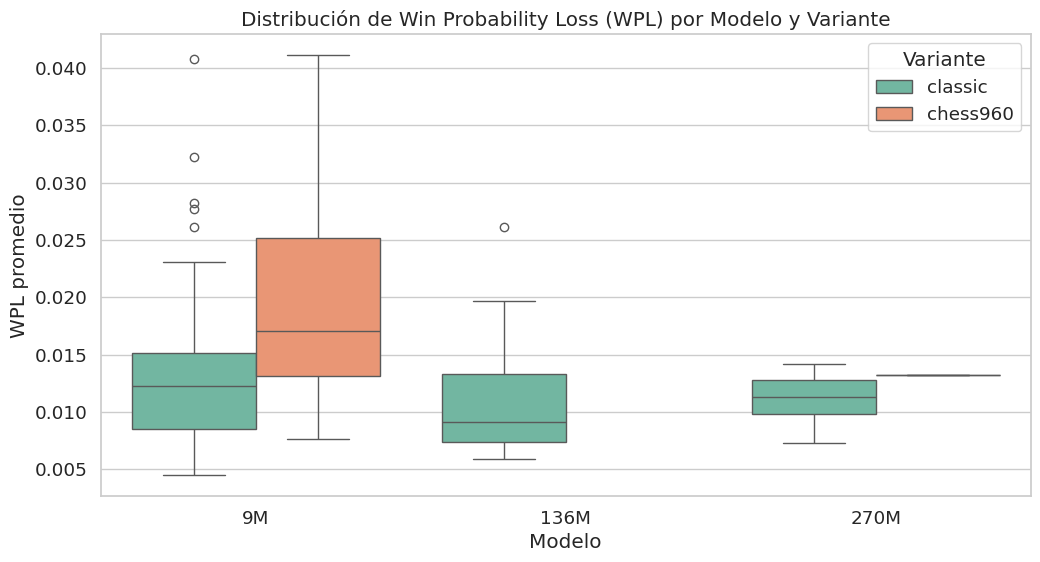

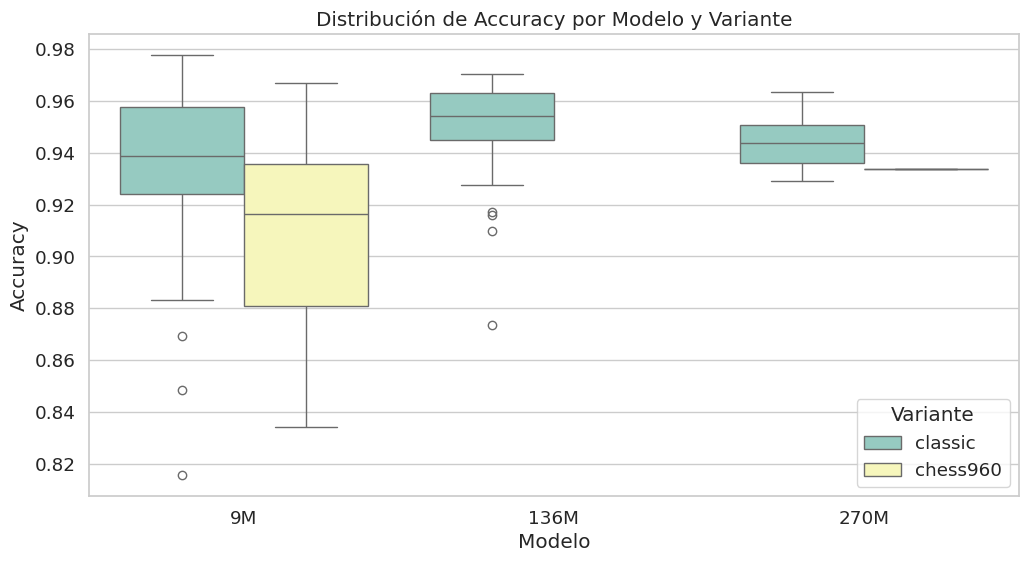

In [45]:

# Configuración estética
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_resultados,
    x='modelo',
    y='bot_wpl_avg',
    hue='modo',
    palette='Set2'
)
plt.title('Distribución de Win Probability Loss (WPL) por Modelo y Variante')
plt.ylabel('WPL promedio')
plt.xlabel('Modelo')
plt.legend(title='Variante')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_resultados,
    x='modelo',
    y='bot_accuracy',
    hue='modo',
    palette='Set3'
)
plt.title('Distribución de Accuracy por Modelo y Variante')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.legend(title='Variante')
plt.show()


In [46]:
df_resultados['nombre_oponente'] = np.where(
    df_resultados['jugador_bot'] == 'Black',
    df_resultados['white'],
    df_resultados['black']
)

In [47]:
# Agrupar por modelo, variante (modo), nombre del oponente y color
agrupado_por_nombre = df_resultados.groupby(['modelo', 'modo', 'nombre_oponente', 'bot_color'])

# Cálculo de métricas
metricas_por_nombre = agrupado_por_nombre.agg({
    'bot_wpl_avg': 'mean',      # Pérdida media de win probability (wpl)
    'bot_accuracy': 'mean',     # Accuracy medio
    'opponent_wpl_avg': 'mean',      # Pérdida media de win probability (wpl)
    'opponent_accuracy': 'mean',     # Accuracy medio
    'num_moves': 'sum',         # Número total de movimientos
    'valid_moves': 'sum'        # Movimientos válidos para el análisis
}).reset_index()


display(metricas_por_nombre)


,modelo,modo,nombre_oponente,bot_color,bot_wpl_avg,bot_accuracy,opponent_wpl_avg,opponent_accuracy,num_moves,valid_moves
0,136M,classic,chechereche,black,0.009750,0.953347,0.015144,0.927179,621,612
1,136M,classic,chechereche,white,0.014228,0.928858,0.027651,0.880837,114,111
2,136M,classic,lichess AI level 6,black,0.010348,0.950498,0.021438,0.901400,1900,639
3,136M,classic,lichess AI level 6,white,0.008477,0.961245,0.015228,0.924925,1799,844
4,136M,classic,lichess AI level 7,black,0.021775,0.894651,0.016322,0.918784,344,314
5,136M,classic,lichess AI level 7,white,0.006538,0.967312,0.004986,0.975072,42,41
6,270M,chess960,chechereche,black,0.013216,0.933919,0.045740,0.809167,26,25
7,270M,classic,chechereche,black,0.011639,0.941805,0.022805,0.885974,492,483
8,270M,classic,chechereche,white,0.009766,0.951170,0.020427,0.897864,138,135
9,9M,chess960,chechereche,white,0.029823,0.879456,0.028185,0.878584,166,164


#### Número de partidas jugadas por modelo, modo de juego y jugador

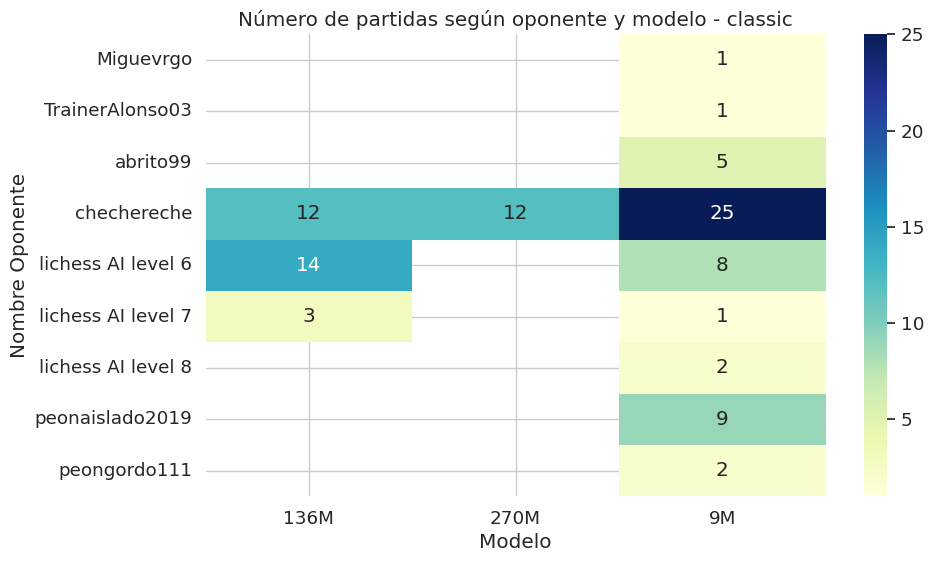

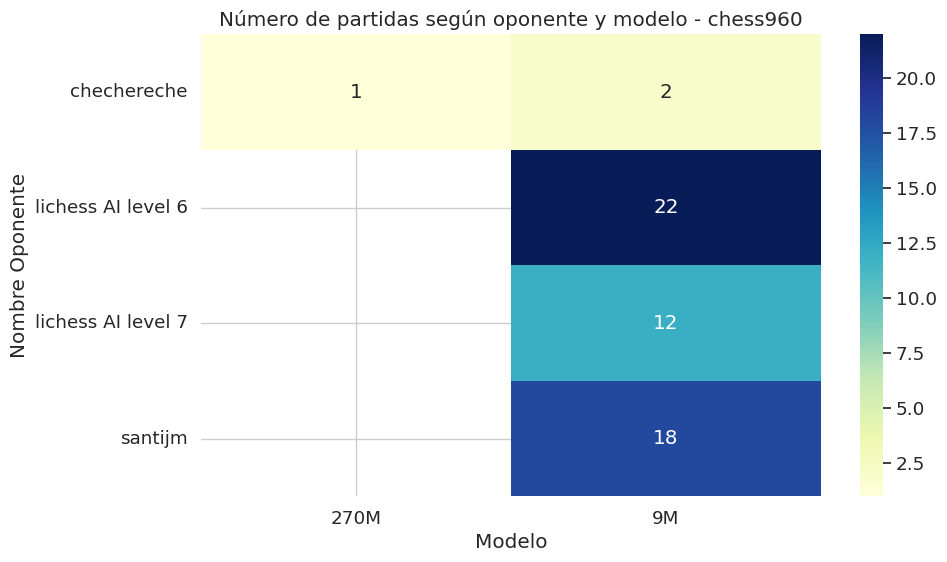

In [48]:
modos = df_resultados['modo'].unique()

for modo in modos:
    pivot = df_resultados[df_resultados['modo'] == modo].pivot_table(
        index='nombre_oponente',
        columns='modelo',
        values='bot_accuracy',  # Puede ser cualquier columna no vacía
        aggfunc='count'          # Contamos el número de partidas
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".0f")  # Sin decimales
    plt.title(f'Número de partidas según oponente y modelo - {modo}')
    plt.xlabel('Modelo')
    plt.ylabel('Nombre Oponente')
    plt.show()


#### Accuracy por modelo, modo de juego y jugador

##### Del bot

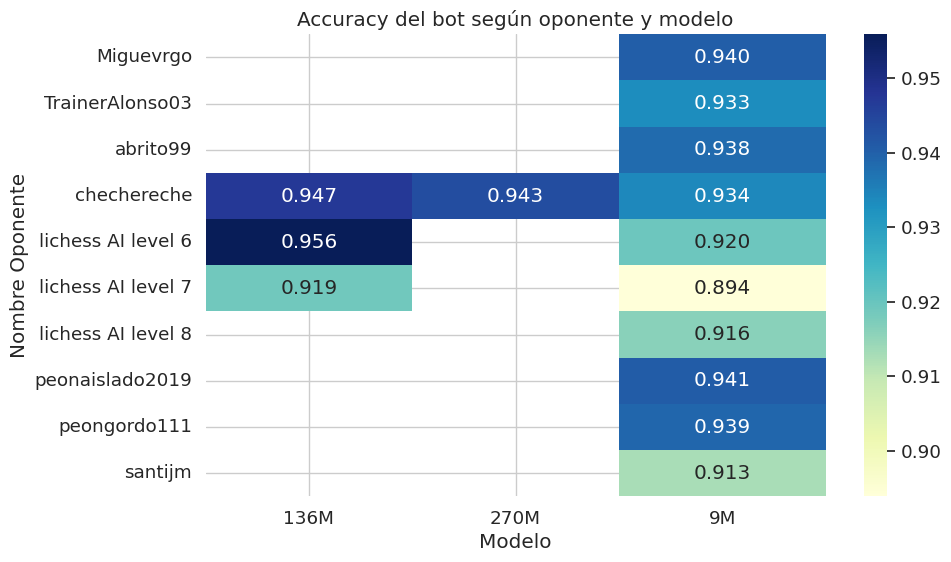

In [49]:
pivot = df_resultados.pivot_table(
    index='nombre_oponente',
    columns='modelo',
    values='bot_accuracy'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Accuracy del bot según oponente y modelo')
plt.xlabel('Modelo')
plt.ylabel('Nombre Oponente')
plt.show()


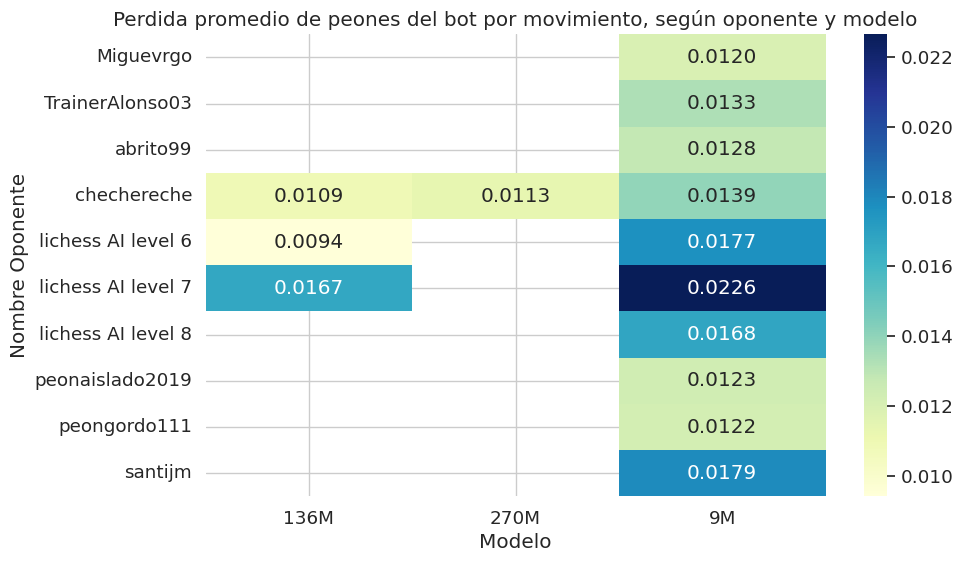

In [50]:
pivot = df_resultados.pivot_table(
    index='nombre_oponente',
    columns='modelo',
    values='bot_wpl_avg'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Perdida promedio de peones del bot por movimiento, según oponente y modelo')
plt.xlabel('Modelo')
plt.ylabel('Nombre Oponente')
plt.show()

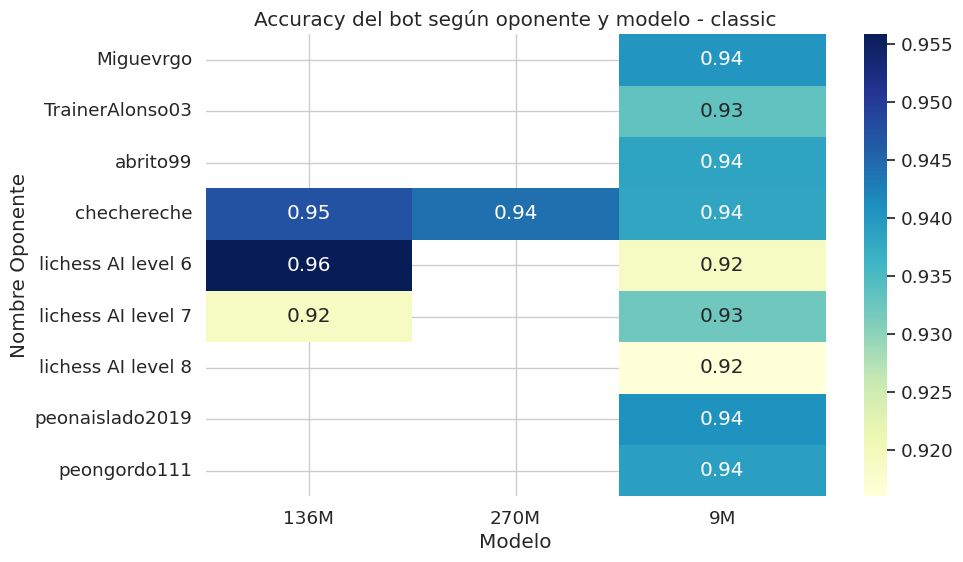

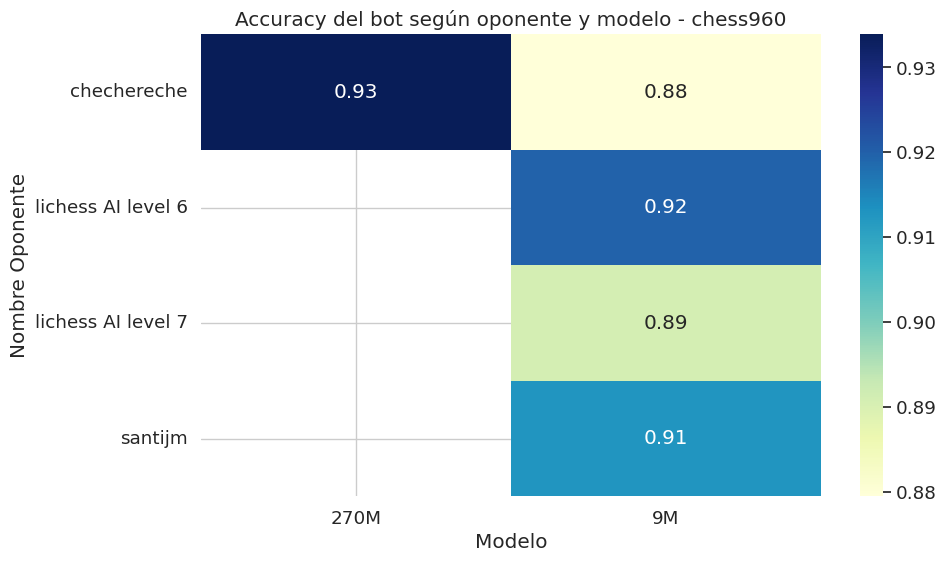

In [51]:
modos = df_resultados['modo'].unique()

for modo in modos:
    pivot = df_resultados[df_resultados['modo'] == modo].pivot_table(
        index='nombre_oponente',
        columns='modelo',
        values='bot_accuracy'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'Accuracy del bot según oponente y modelo - {modo}')
    plt.xlabel('Modelo')
    plt.ylabel('Nombre Oponente')
    plt.show()


##### Del oponente

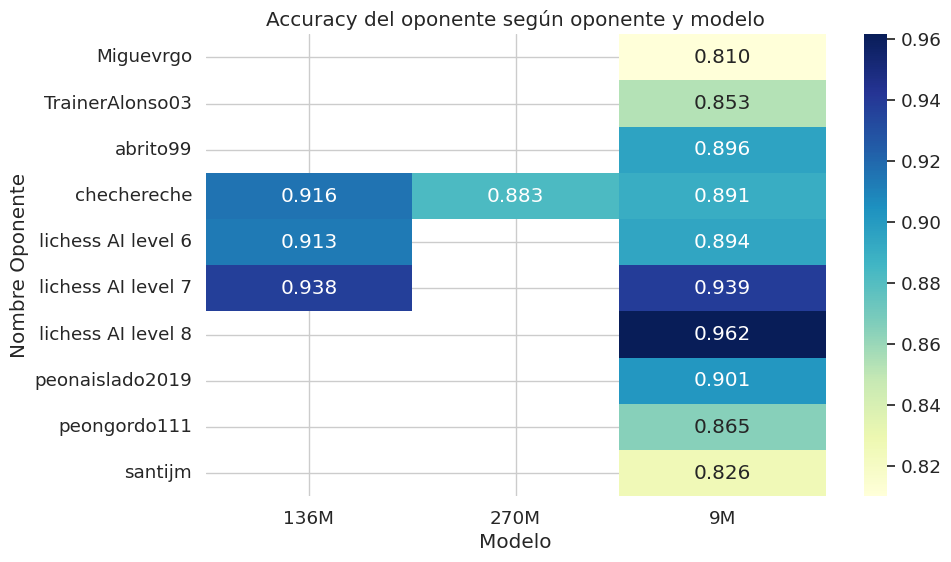

In [55]:
pivot = df_resultados.pivot_table(
    index='nombre_oponente',
    columns='modelo',
    values='opponent_accuracy'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Accuracy del oponente según oponente y modelo')
plt.xlabel('Modelo')
plt.ylabel('Nombre Oponente')
plt.show()


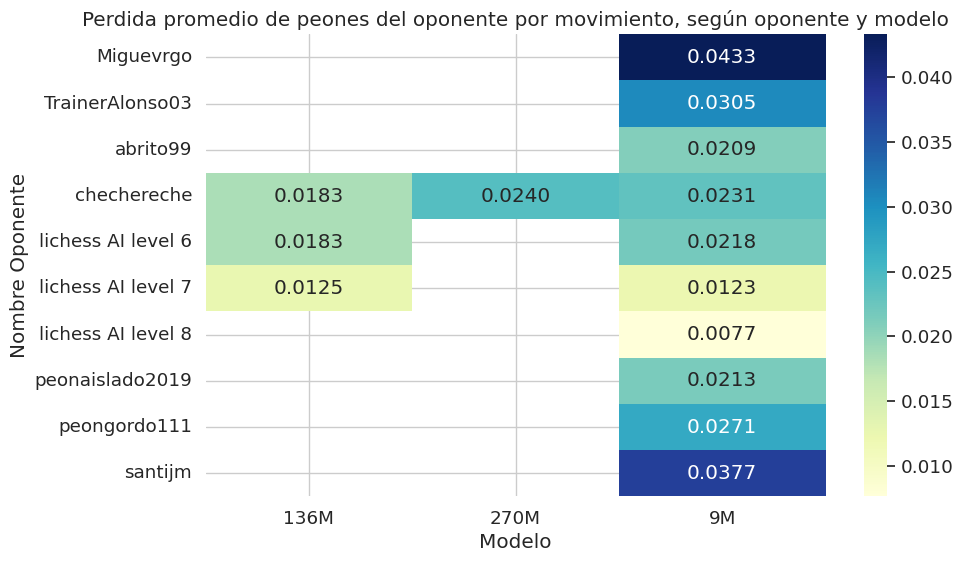

In [56]:
pivot = df_resultados.pivot_table(
    index='nombre_oponente',
    columns='modelo',
    values='opponent_wpl_avg'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Perdida promedio de peones del oponente por movimiento, según oponente y modelo')
plt.xlabel('Modelo')
plt.ylabel('Nombre Oponente')
plt.show()

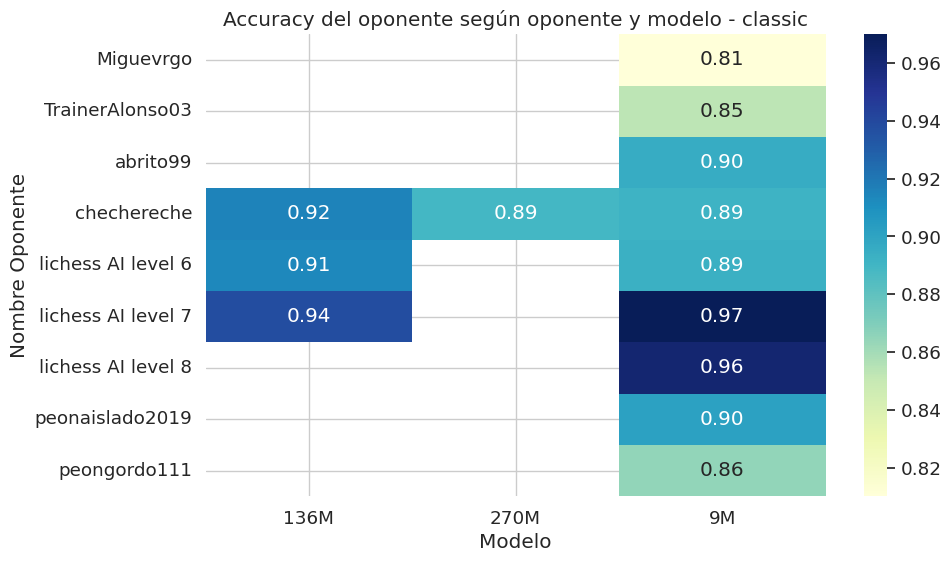

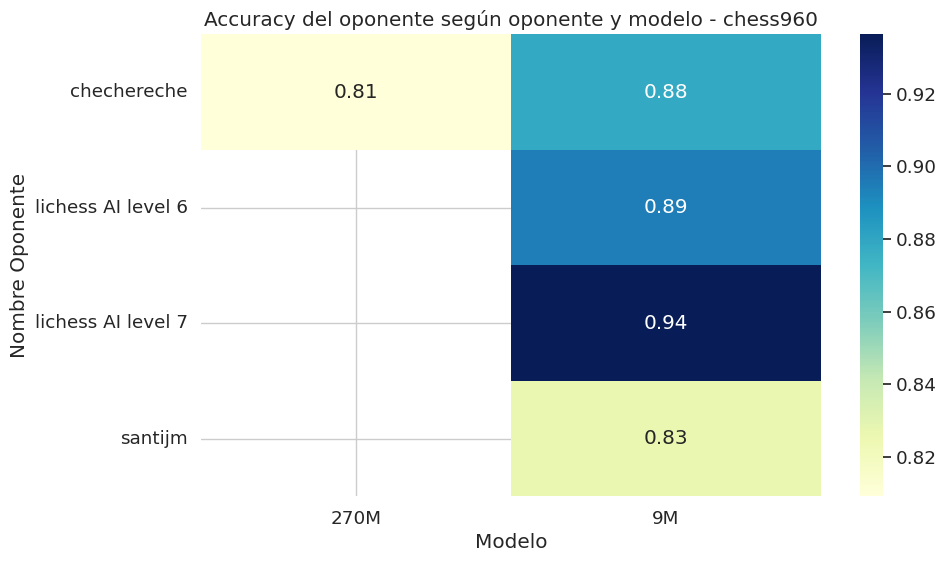

In [57]:
modos = df_resultados['modo'].unique()

for modo in modos:
    pivot = df_resultados[df_resultados['modo'] == modo].pivot_table(
        index='nombre_oponente',
        columns='modelo',
        values='opponent_accuracy'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'Accuracy del oponente según oponente y modelo - {modo}')
    plt.xlabel('Modelo')
    plt.ylabel('Nombre Oponente')
    plt.show()


#### Errores promedio del bot por partida

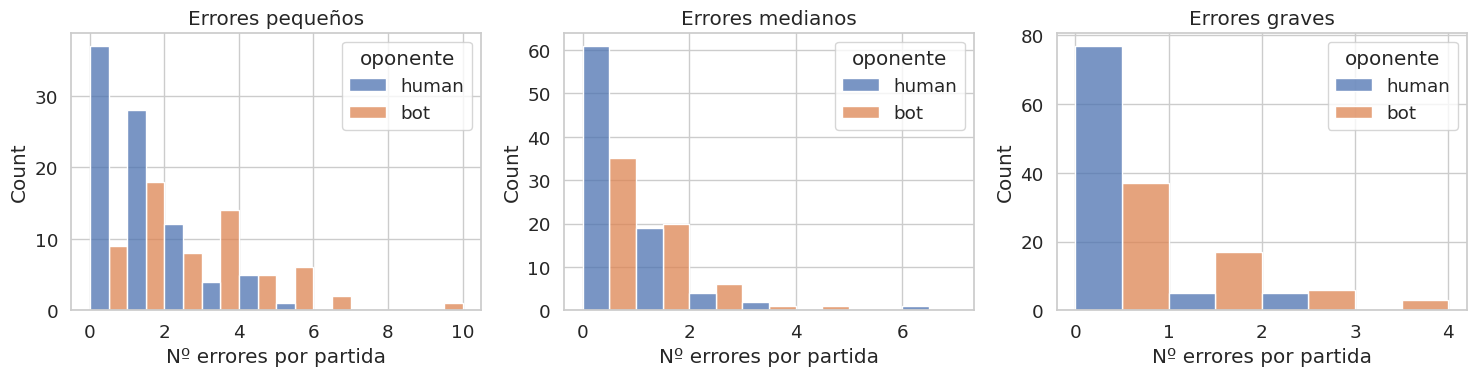

In [64]:
plt.figure(figsize=(15, 4))

# Pequeños
plt.subplot(1, 3, 1)
sns.histplot(
    data=df_resultados, 
    x='bot_small_mistakes', 
    hue='oponente',
    bins=10,
    multiple='dodge',
    #palette={'humano': 'green', 'bot': 'lightgreen'}
)
plt.title('Errores pequeños')
plt.xlabel('Nº errores por partida')

# Medianos
plt.subplot(1, 3, 2)
sns.histplot(
    data=df_resultados, 
    x='bot_medium_mistakes', 
    hue='oponente',
    bins=7,
    multiple='dodge',
    #palette={'humano': 'orange', 'bot': 'gold'}
)
plt.title('Errores medianos')
plt.xlabel('Nº errores por partida')

# Graves
plt.subplot(1, 3, 3)
sns.histplot(
    data=df_resultados, 
    x='bot_big_mistakes', 
    hue='oponente',
    bins=4,
    multiple='dodge',
    #palette={'humano': 'red', 'bot': 'salmon'}
)
plt.title('Errores graves')
plt.xlabel('Nº errores por partida')

plt.tight_layout()
plt.show()


### Análisis a nivel de movimiento

In [79]:
def crear_dataframe_movimientos(partidas):
    """
    Convierte las partidas en un dataframe a nivel de movimiento.
    
    Args:
        partidas: Diccionario de partidas como el generado por cargar_todas_partidas()
    
    Returns:
        DataFrame con una fila por movimiento.
    """
    datos = []

    for modelo in partidas.keys():
        for oponente in partidas[modelo].keys():
            for modo in partidas[modelo][oponente].keys():
                juegos = partidas[modelo][oponente][modo]
                
                for game in tqdm(juegos, desc=f"{modelo}-{oponente}-{modo}"):
                    evaluations = extract_evaluations(game)
                    
                    if not evaluations or len(evaluations) < 2:
                        continue
                    
                    is_white_bot = "ThinkLess" in game.headers["White"]
                    is_black_bot = "ThinkLess" in game.headers["Black"]
                    
                    if not (is_white_bot ^ is_black_bot):
                        continue
                    
                    bot_color = 'white' if is_white_bot else 'black'
                    
                    moves = list(game.mainline_moves())
                    
                    for i in range(1, len(evaluations)):
                        eval_prev = evaluations[i-2] if i > 1 else evaluations[i-1]
                        eval_current = evaluations[i-1]

                        if eval_prev is None or eval_current is None:
                            continue

                        delta = eval_current - eval_prev
                        abs_delta = abs(delta)

                        player_turn = 'white' if i % 2 == 1 else 'black'
                        is_bot_move = (player_turn == bot_color)
                        moving_player = 'bot' if is_bot_move else 'opponent'

                        # Error classification
                        if abs_delta > 0.2:
                            error_type = 'big_mistake'
                        elif abs_delta > 0.1:
                            error_type = 'medium_mistake'
                        elif abs_delta > 0.05:
                            error_type = 'small_mistake'
                        else:
                            error_type = 'none'

                        # Win probability perspective for bot
                        bot_eval = eval_current if bot_color == 'black' else 1 - eval_current

                        datos.append({
                            'modelo': modelo,
                            'oponente': oponente,
                            'opponent_name': game.headers.get('Black' if is_white_bot else 'White', ''),
                            'modo': modo,
                            'jugador_que_mueve': moving_player,
                            'turno_color': player_turn,
                            'num_movimiento': i,
                            'movimiento_uci': moves[i-1].uci() if i-1 < len(moves) else None,
                            'eval_antes': eval_prev,
                            'eval_despues': eval_current,
                            'delta': delta,
                            'abs_delta': abs_delta,
                            'error_type': error_type,
                            'bot_eval_perspective': bot_eval,
                            'result': game.headers.get('Result', ''),
                            'termination': game.headers.get('Termination', ''),
                            'eco': game.headers.get('ECO', ''),
                            'opening': game.headers.get('Opening', ''),
                            'bot_color': bot_color,
                            'event': game.headers.get('Event', ''),
                            'site': game.headers.get('Site', '')
                        })
    df = pd.DataFrame(datos)
    return df


In [80]:
df_movimientos = crear_dataframe_movimientos(partidas_completas)
print(f"Total de movimientos analizados: {len(df_movimientos)}")

136M-human-classic: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1410.01it/s]
136M-human-chess960: 0it [00:00, ?it/s]
136M-bot-classic: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 394.42it/s]
136M-bot-chess960: 0it [00:00, ?it/s]
270M-human-chess960: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1390.68it/s]
270M-bot-classic: 0it [00:00, ?it/s]
270M-bot-chess960: 0it [00:00, ?it/s]


Total de movimientos analizados: 17642


In [81]:
print(df_movimientos.columns)
df_movimientos

Index(['modelo', 'oponente', 'opponent_name', 'modo', 'jugador_que_mueve',
       'turno_color', 'num_movimiento', 'movimiento_uci', 'eval_antes',
       'eval_despues', 'delta', 'abs_delta', 'error_type',
       'bot_eval_perspective', 'result', 'termination', 'eco', 'opening',
       'bot_color', 'event', 'site'],
      dtype='object')


,modelo,oponente,opponent_name,modo,jugador_que_mueve,turno_color,num_movimiento,movimiento_uci,eval_antes,eval_despues,...,abs_delta,error_type,bot_eval_perspective,result,termination,eco,opening,bot_color,event,site
0,9M,human,chechereche,classic,bot,white,1,e2e4,0.516563,0.516563,...,0.000000,none,0.483437,1-0,Normal,B47,,white,casual rapid game,https://lichess.org/bot5wpNA
1,9M,human,chechereche,classic,opponent,black,2,c7c5,0.516563,0.522997,...,0.006433,none,0.477003,1-0,Normal,B47,,white,casual rapid game,https://lichess.org/bot5wpNA
2,9M,human,chechereche,classic,bot,white,3,g1f3,0.522997,0.518402,...,0.004595,none,0.481598,1-0,Normal,B47,,white,casual rapid game,https://lichess.org/bot5wpNA
3,9M,human,chechereche,classic,opponent,black,4,e7e6,0.518402,0.525752,...,0.007350,none,0.474248,1-0,Normal,B47,,white,casual rapid game,https://lichess.org/bot5wpNA
4,9M,human,chechereche,classic,bot,white,5,b1c3,0.525752,0.523915,...,0.001836,none,0.476085,1-0,Normal,B47,,white,casual rapid game,https://lichess.org/bot5wpNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,270M,human,chechereche,chess960,opponent,white,21,e1f2,0.086840,0.084532,...,0.002308,none,0.084532,0-1,Normal,?,,black,casual Chess960 game,https://lichess.org/JCmbxhQD
17638,270M,human,chechereche,chess960,bot,black,22,c5c4,0.084532,0.090711,...,0.006179,none,0.090711,0-1,Normal,?,,black,casual Chess960 game,https://lichess.org/JCmbxhQD
17639,270M,human,chechereche,chess960,opponent,white,23,b3d4,0.090711,0.071821,...,0.018890,none,0.071821,0-1,Normal,?,,black,casual Chess960 game,https://lichess.org/JCmbxhQD
17640,270M,human,chechereche,chess960,bot,black,24,b2b4,0.071821,0.075078,...,0.003257,none,0.075078,0-1,Normal,?,,black,casual Chess960 game,https://lichess.org/JCmbxhQD


/tmp/ipykernel_2561905/332415644.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_errors_bot = df_errors[df_movimientos['jugador_que_mueve'] == 'bot']  # Solo movimientos del bot
/tmp/ipykernel_2561905/332415644.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tipo de error')


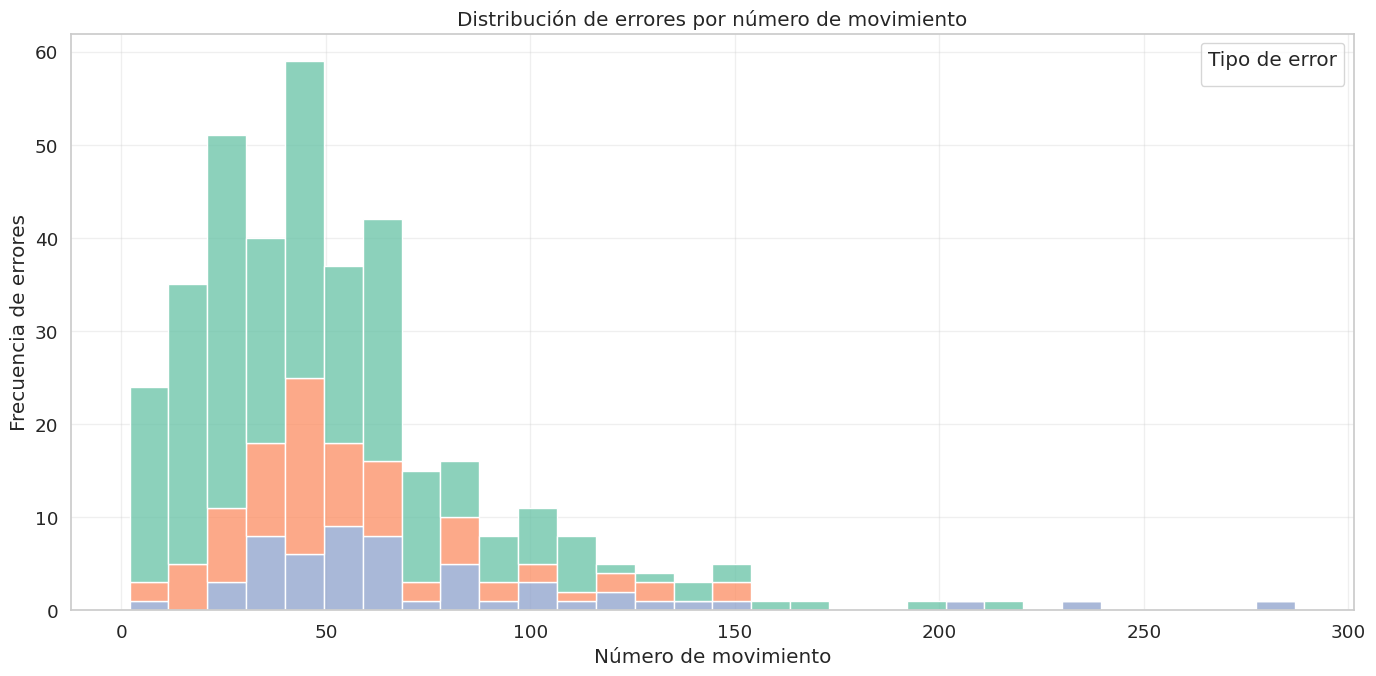

In [115]:
# Filtramos solo los movimientos con error (descartamos 'none')
df_errors = df_movimientos[df_movimientos['error_type'] != 'none']
df_errors_bot = df_errors[df_movimientos['jugador_que_mueve'] == 'bot']  # Solo movimientos del bot
# Creamos el plot
plt.figure(figsize=(14, 7))
sns.histplot(
    data=df_errors_bot,
    x='num_movimiento',
    hue='error_type',
    multiple='stack',
    bins=30,
    kde=False,
    palette='Set2',
    hue_order=['small_mistake', 'medium_mistake', 'big_mistake']
)

plt.title('Distribución de errores por número de movimiento')
plt.xlabel('Número de movimiento')
plt.ylabel('Frecuencia de errores')
plt.legend(title='Tipo de error')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


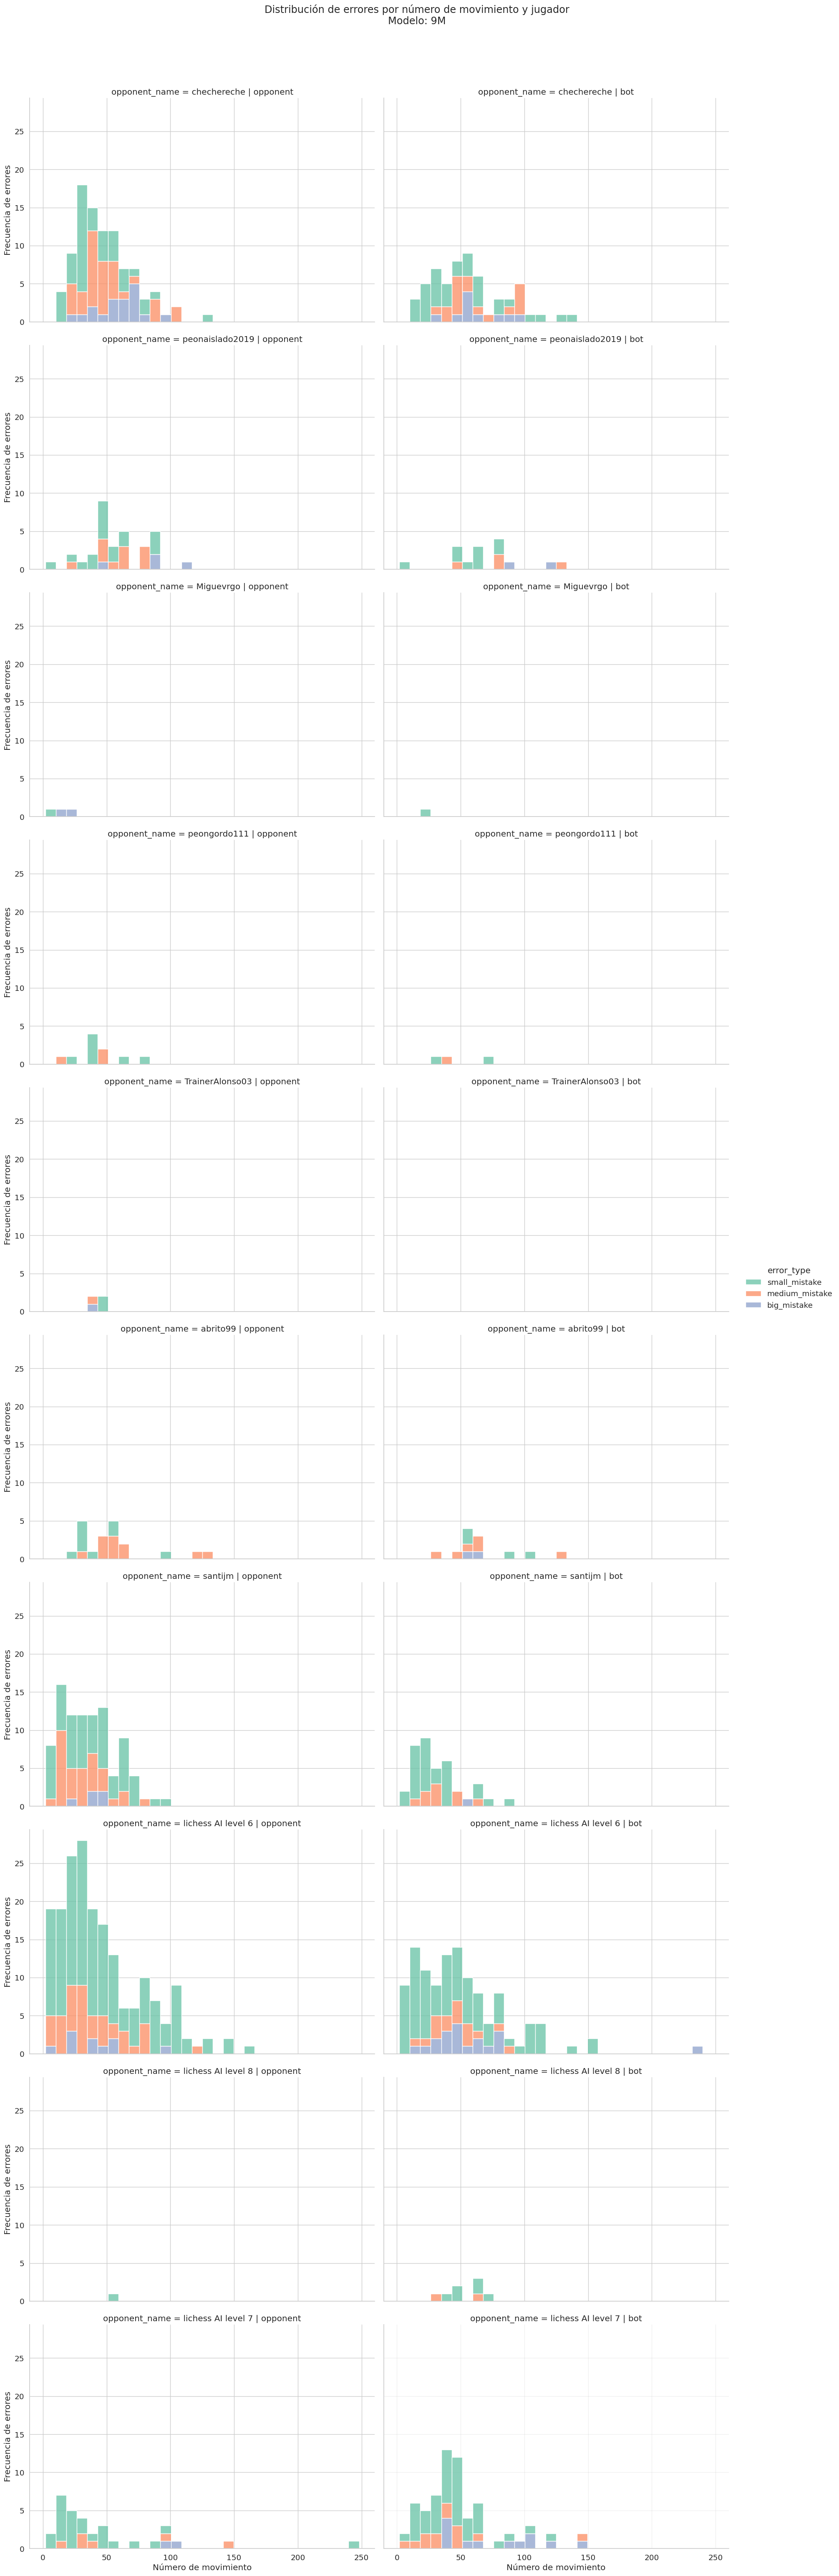

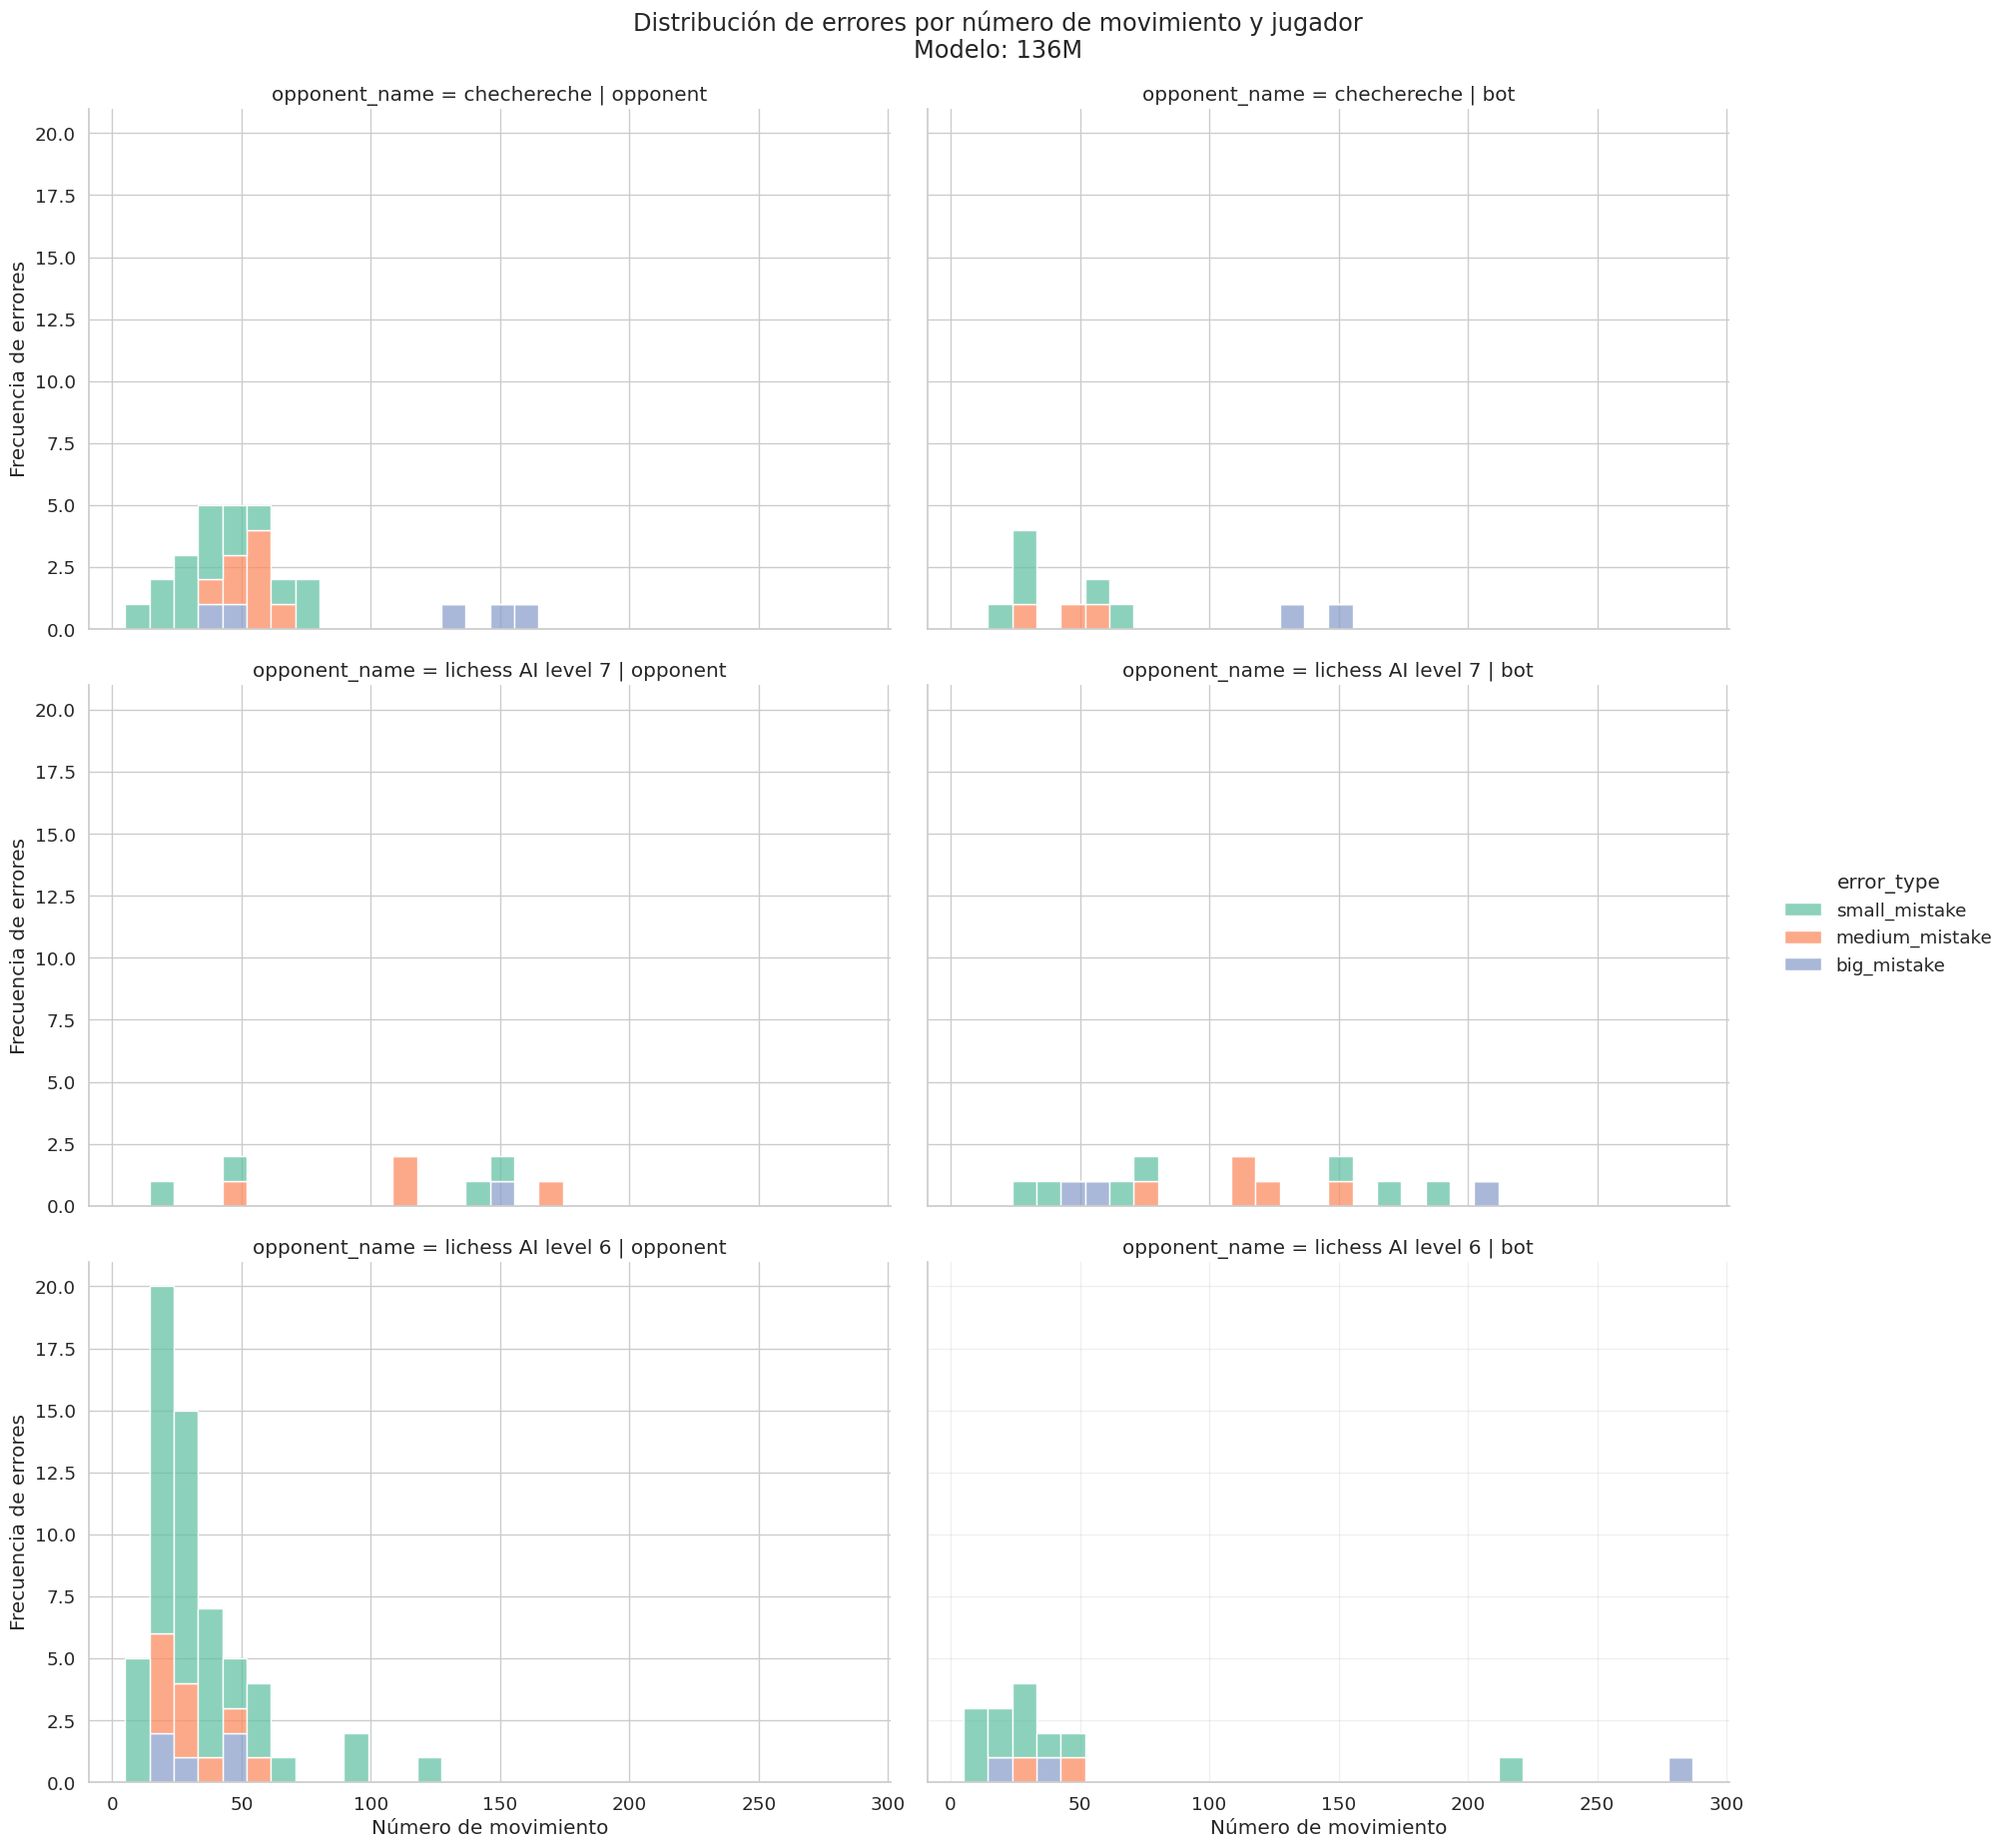

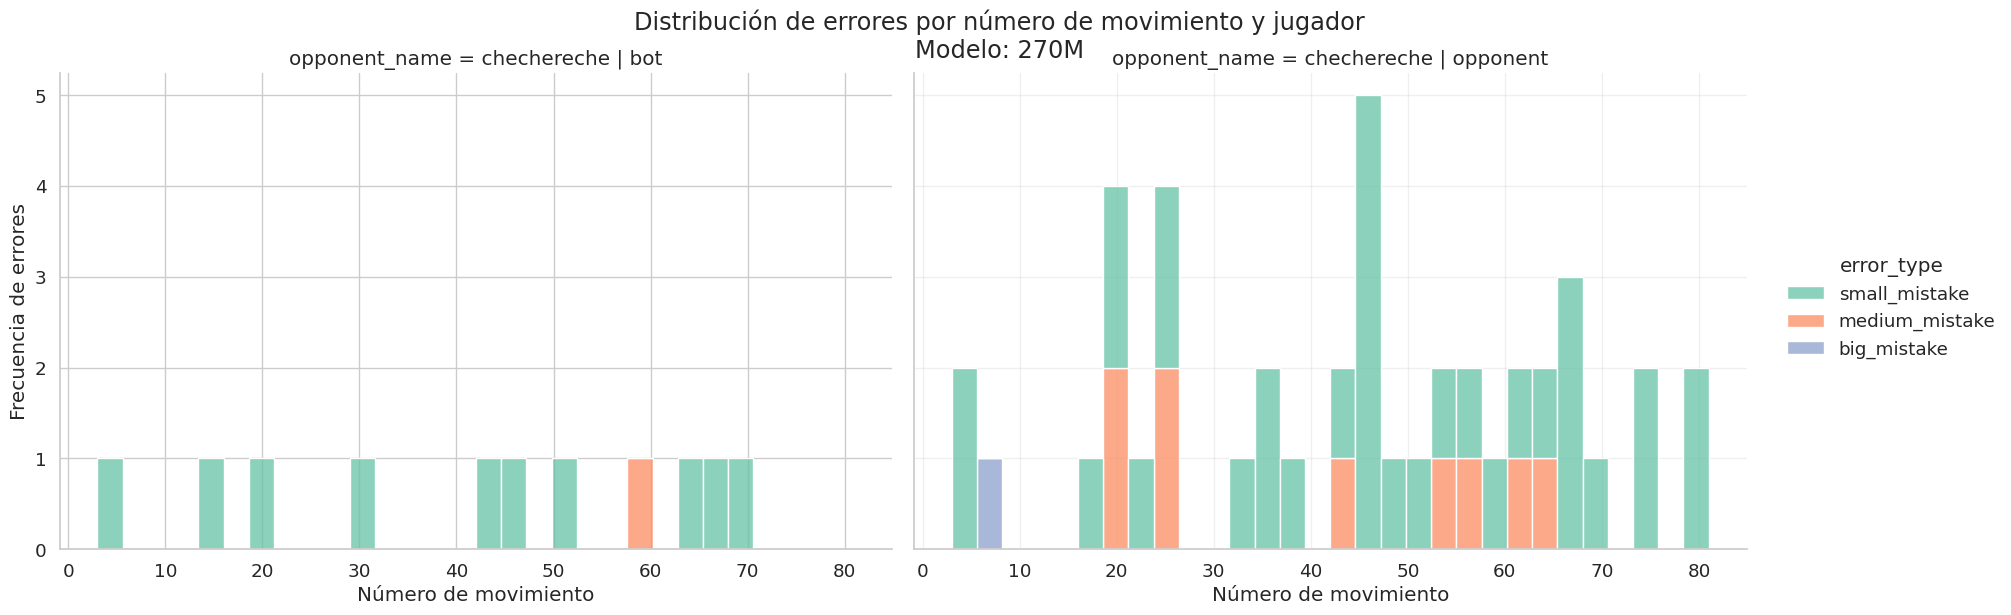

In [112]:
modelos = df_errors['modelo'].unique()
df_errors_bot = df_movimientos[df_movimientos['num_movimiento'] < 150] 
for modelo in modelos:
    subset = df_errors[df_errors['modelo'] == modelo]

    g = sns.displot(
        data=subset,
        x='num_movimiento',
        hue='error_type',
        row='opponent_name',
        col='jugador_que_mueve',
        multiple='stack',
        bins=30,
        palette='Set2',
        hue_order=['small_mistake', 'medium_mistake', 'big_mistake'],
        height=6,
        aspect=1.5
    )

    g.set_titles(col_template="{col_name}")
    g.set_axis_labels('Número de movimiento', 'Frecuencia de errores')
    g.fig.suptitle(f'Distribución de errores por número de movimiento y jugador\nModelo: {modelo}', y=1.03)

    plt.grid(alpha=0.3)
    plt.show()


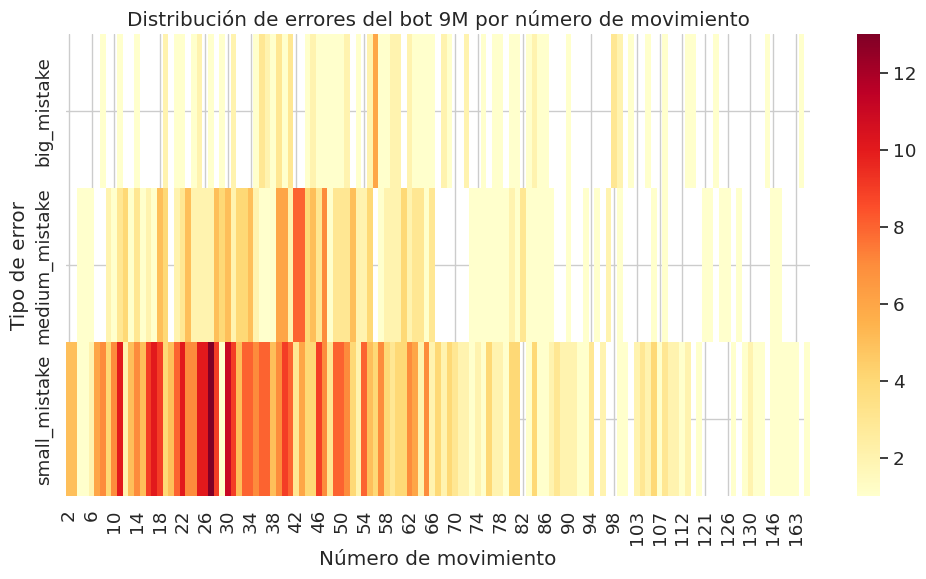

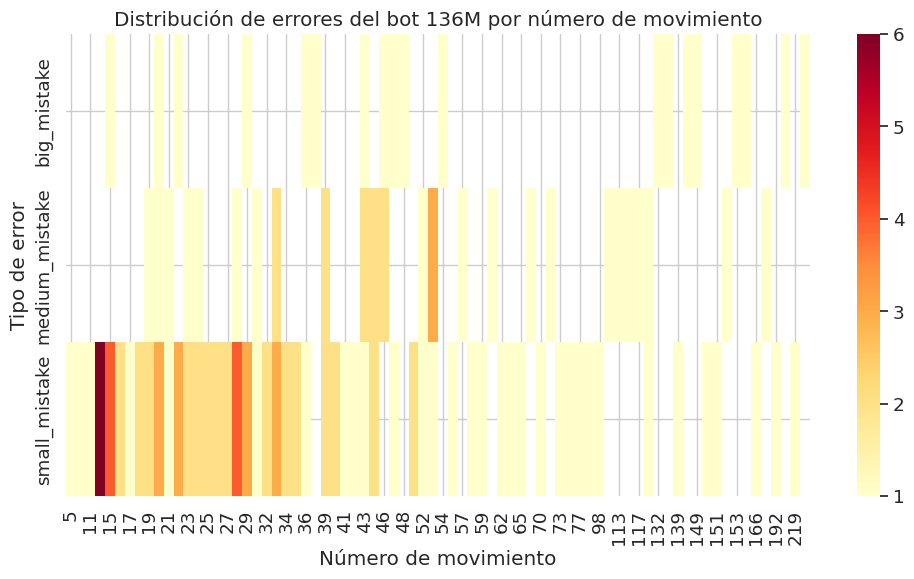

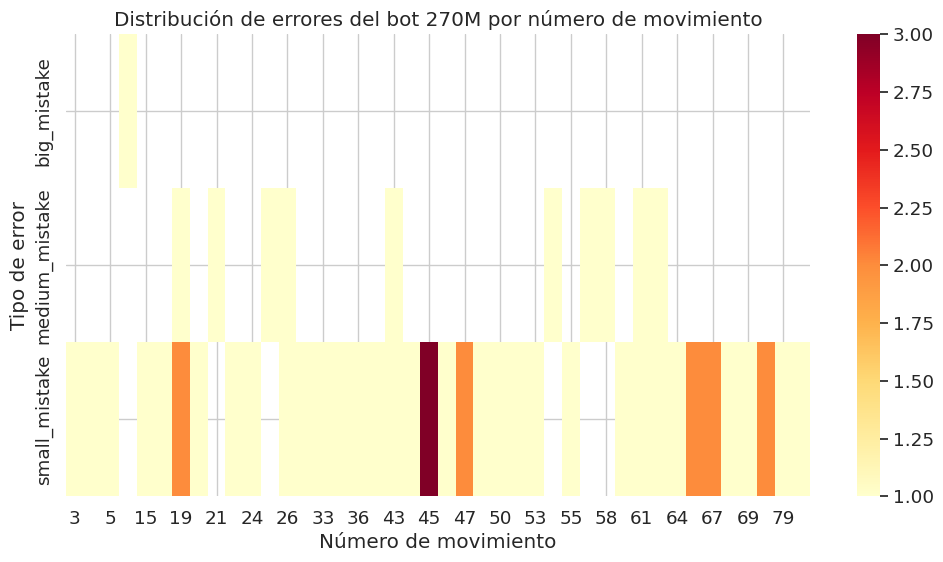

In [120]:
for modelo in modelos:
    subset = df_errors[df_errors['modelo'] == modelo]

    pivot = (
        subset
        .groupby(['num_movimiento', 'error_type'])
        .size()
        .reset_index(name='count')
        .pivot(index='error_type', columns='num_movimiento', values='count')
    )

    sns.heatmap(pivot, cmap="YlOrRd", annot=False)
    plt.title(f'Distribución de errores del bot {modelo} por número de movimiento')
    plt.xlabel('Número de movimiento')
    plt.ylabel('Tipo de error')
    plt.show()
